In [465]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/klno/co2 --filename=out.log --output=../data/co2-klno.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/k-sos-mp2/co2 --filename=out.log --output=../data/co2-k-sos-mp2.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/ref-kpts/co2 --filename=out.log --output=../data/co2-ref-kpts.json

In [466]:
import os, sys, json
import pandas as pd

def load_data(f):
    # Load the JSON data as a dictionary first
    with open(f, 'r') as file:
        data = json.load(file)
    
    # Convert the nested dictionary to a list of records
    records = []
    for path, params in data.items():
        # Add the path as a field and merge with params
        record = {'path': path, **params}
        records.append(record)
    
    # Create DataFrame from records
    return pd.DataFrame(records)

method = 'fftisdf-140-14'

d = load_data("../data/co2-ref-kpts.json")
data_co2_ref_kpts = d[d['method'] == method]

d = load_data('../data/co2-klno.json')
data_co2_klno = d[d['method'] == method]

d = load_data('../data/co2-k-sos-mp2.json')
data_co2_k_sos_mp2 = d[d['method'] == method]

In [467]:
# plot all the results
nkpt = data_co2_klno['nkpt'].unique()
nkpt.sort()
nkpt = nkpt[:-1]

for nk in nkpt:
    colors = ['r', 'g', 'b']
    label = ['e_corr_klno_corr_os', 'e_corr_klno_corr_mp2', 'e_corr_klno_corr_ccsd', 'e_corr_klno_corr_ccsd_t']
    cols = data_co2_klno[data_co2_klno['nkpt'] == nk][label]
    x0 = data_co2_k_sos_mp2[data_co2_k_sos_mp2['nkpt'] == nk]['ene_os_lt30'].item()
    x0 = x0 * 1.3

    # print(f"nkpt: {nk}")
    cols = cols[cols != 0]
    # delete NaN
    cols = cols.dropna()
    # sort by e_corr_klno_corr_os
    cols = cols.sort_values('e_corr_klno_corr_os')


    import matplotlib.pyplot as plt
    # fig, ax = plt.subplots()
    # ax.text(0.1, 0.9, r"$N_{\mathrm{{kpt}}} = {%d}$" % nk, transform=ax.transAxes)
    fig, ax = None, None

    ene_krhf = data_co2_klno[data_co2_klno['nkpt'] == nk]['ene_krhf'].values[0]
    out = "nk = %4d, ene_krhf = %12.8f, ene_sos_mp2 = %12.8f" % (nk, ene_krhf, ene_krhf + x0 * 1.3)
    for il, l in enumerate(label[1:]):
        x = cols['e_corr_klno_corr_os']
        y = cols[l]
        # delete repeated values
        x = x.drop_duplicates()
        y = y.drop_duplicates()
        x = x * 1.3

        import numpy, scipy
        from scipy.optimize import curve_fit

        if il == 1:
            r = numpy.polyfit(x[:2], y[:2], 1)
        else:
            r = numpy.polyfit(x[:3], y[:3], 1)
        p = numpy.poly1d(r)
        y0 = p(x0)

        # ax.scatter(x, y, c=colors[il], label=l, s=10, alpha=0.5)
        # xmin = min(x.min(), x0)
        # xmax = max(x.max(), x0)
        # x = numpy.linspace(xmin - 0.1, xmax + 0.1, 100)
        # y = p(x)
        # ax.plot(x, y, color=colors[il], linestyle='--', marker='')
        # ax.scatter([x0], [y0], c=colors[il], marker='x')
        # ax.legend()

        # if il == 0:
        #     ax.set_xlim(xmin - 0.05, xmin + 0.05)
        #     ax.set_ylim(y0 - 0.05, y0 + 0.05)

        name = "ene_" + l.split('e_corr_klno_corr_')[-1]
        out += f", {name} = {y0 + ene_krhf:12.8f}"

    print(out)



nk =    1, ene_krhf = -148.23787132, ene_sos_mp2 = -150.50115762, ene_mp2 = -150.08991258, ene_ccsd = -150.10842268, ene_ccsd_t = -150.17785976
nk =    2, ene_krhf = -148.14659542, ene_sos_mp2 = -150.43409942, ene_mp2 = -150.02064848, ene_ccsd = -150.03214476, ene_ccsd_t = -150.10503245
nk =    4, ene_krhf = -148.10062138, ene_sos_mp2 = -150.40095018, ene_mp2 = -149.98631906, ene_ccsd = -149.99437186, ene_ccsd_t = -150.06881062
nk =    8, ene_krhf = -148.07783580, ene_sos_mp2 = -150.38543131, ene_mp2 = -149.97023529, ene_ccsd = -149.97609909, ene_ccsd_t = -150.05206136
nk =   12, ene_krhf = -148.07049376, ene_sos_mp2 = -150.38013005, ene_mp2 = -149.96476131, ene_ccsd = -149.96989609, ene_ccsd_t = -150.04613820
nk =   18, ene_krhf = -148.06442375, ene_sos_mp2 = -150.37536551, ene_mp2 = -149.95988354, ene_ccsd = -149.96436682, ene_ccsd_t = -150.04080811
nk =   27, ene_krhf = -148.06113188, ene_sos_mp2 = -150.37300578, ene_mp2 = -149.95744857, ene_ccsd = -149.96159043, ene_ccsd_t = -150.0

In [468]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{color}\usepackage{colortbl}"

from pathlib import Path

figpath = Path("/Users/yangjunjie/Desktop/fftisdf-embedding/fig/")
assert figpath.exists()

from matplotlib.colors import TABLEAU_COLORS
colors = list(TABLEAU_COLORS)

markersize = 4
s = (markersize / 2) ** 2 * 3.14

style = {
    "hf": {
        "color": colors[0],
        "marker": "o",
        "linestyle": "-",
        "alpha": 1.0,
        "s": s,
    },
    "e_corr_k_sos_mp2": {
        "color": colors[1],
        "marker": "s",
        "linestyle": "--",
        "alpha": 1.0,
        "s": s,
    },
    "e_corr_klno_corr_mp2": {
        "color": colors[1],
        "marker": "o",
        "linestyle": "-",
        "alpha": 1.0,
        "s": s,
    },
    "e_corr_klno_corr_ccsd": {
        "color": colors[3],
        "marker": "o",
        "linestyle": "-",
        "alpha": 1.0,
        "s": s,
    },
    "e_corr_klno_corr_ccsd_t": {
        "color": colors[4],
        "marker": "o",
        "linestyle": "-",
        "alpha": 1.0,
        "s": s,
    },
}


l = e_corr_klno_corr_mp2, e_corr_lno =  -1.85188899, e_corr_ref =  -1.85173432, err = -1.2889e-05
l = e_corr_klno_corr_ccsd, e_corr_lno =  -1.87102917, e_corr_ref =  -1.87033413, err = -5.7920e-05
l = e_corr_klno_corr_ccsd_t, e_corr_lno =  -1.94056349, e_corr_ref =  -1.93977072, err = -6.6064e-05
l = e_corr_klno_corr_mp2, e_corr_lno =  -1.89234400, e_corr_ref =  -1.89376714, err = 1.1859e-04


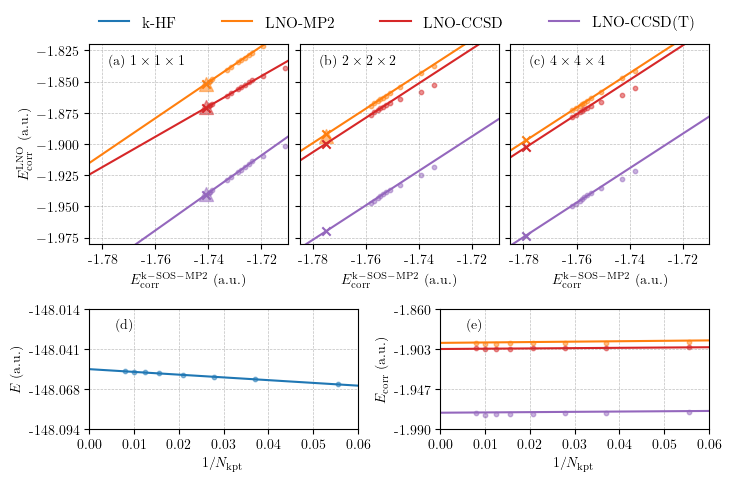

In [469]:
nkpts = data_co2_klno['nkpt'].unique()
nkpts.sort()
nkpts = nkpts

fig = plt.figure(figsize=(8, 5))
fontszie = 12

from matplotlib import gridspec
gs = gridspec.GridSpec(3, 9, height_ratios=[1, 0.1, 0.6])

ax1 = fig.add_subplot(gs[0, 0:3])
ax2 = fig.add_subplot(gs[0, 3:6])
ax3 = fig.add_subplot(gs[0, 6:9])
# for ax in [ax1, ax2, ax3]:
#     ax.set_aspect('equal')

ax4 = fig.add_subplot(gs[2, 0:4])
ax5 = fig.add_subplot(gs[2, 5:9])

axs = [ax1, ax2, ax3, ax4, ax5]
axd = {
    1.0: ax1,
    8.0: ax2,
    64.0: ax3,
    "hf-ex": ax4,
    "e-corr-ex": ax5,
}

e_khf_kpts = []
e_corr_k_sos_mp2_kpts = []

e_corr_klno_kpts = {
    "e_corr_klno_corr_mp2": [],
    "e_corr_klno_corr_ccsd": [],
    "e_corr_klno_corr_ccsd_t": [],
}

for ik, nk in enumerate(nkpts):
    ax = axd.get(nk, None)
    if ax is not None:
        ix = axs.index(ax)
        path = data_co2_klno[data_co2_klno['nkpt'] == nk]['path'].values[0]
        kmesh = path.split('/')[-3]
        text = "(%s) $%s$" % ("abcde"[ix], kmesh.replace('-', r'\times'))
        ax.text(0.1, 0.9, text, transform=ax.transAxes)
        ax.set_xlabel(r"$E_{\mathrm{corr}}^{\mathrm{k-SOS-MP2}}$ (a.u.)")

        if ix == 0:
            ax.set_ylabel(r"$E_{\mathrm{corr}}^{\mathrm{LNO}}$ (a.u.)")

    x = data_co2_klno[data_co2_klno['nkpt'] == nk]['e_corr_klno_corr_os']
    x0 = data_co2_k_sos_mp2[data_co2_k_sos_mp2['nkpt'] == nk]
    x0 = x0["ene_corr_k_sos_lt40_mp2"]
    x0 = x0.item()

    e_khf_kpts.append(data_co2_klno[data_co2_klno['nkpt'] == nk]['ene_krhf'].values[0])
    e_corr_k_sos_mp2_kpts.append(x0)

    cols = data_co2_klno[data_co2_klno['nkpt'] == nk]
    slope = None

    # y0 = data_co2_ref_kpts[data_co2_ref_kpts['nkpt'] == nk]
    # y0 = [y0["ene_corr_kmp2"], y0["ene_corr_kccsd"], None]
    # if nk == 1.0:
    #     y0[-1] = cols["e_corr_klno_corr_ccsd_t"].values[0]

    for il, l in enumerate(label[1:]):
        x = cols['e_corr_klno_corr_os'] * 1.3
        y = cols[l]
        x = x.dropna()
        y = y.dropna()
        x = x.sort_values()
        y = y.sort_values()

        yref = None
        if "mp2" in l:
            yref = data_co2_ref_kpts[data_co2_ref_kpts['nkpt'] == nk]["ene_corr_kmp2"]
        elif "ccsd" in l and "ccsd_t" not in l:
            yref = data_co2_ref_kpts[data_co2_ref_kpts['nkpt'] == nk]["ene_corr_kccsd"]
        elif "ccsd_t" in l:
            yref = y.iloc[0]
            if nk > 1.0:
                yref = None

        if isinstance(yref, pd.Series):
            if len(yref) == 0:
                yref = None
            else:
                yref = yref.values[0]

        if pd.isna(yref):
            yref = None

        if yref is not None and ax is not None:
            s = style[l]
            ax.scatter([x0], [yref], c=s['color'], marker='^', s=100, alpha=0.5)

        if nk == 1.0:
            x = x[12:]
            y = y[12:]

        # print("nk = ", nk)
        # print("x = \n", x)
        # print("y = \n", y)
        # assert 1 == 2

        import numpy, scipy
        from scipy.optimize import curve_fit

        # if il == 0:
        if slope is None:
            x1 = x.drop_duplicates()
            y1 = y.drop_duplicates()
            
            if nk == 1.0:
                x1 = x1[:6]
                y1 = y1[:6]

            elif nk in [100.0, 125.0]:
                x1 = x1[:2]
                y1 = y1[:2]

            else:
                x1 = x1[:4]
                y1 = y1[:4]

            r = numpy.polyfit(x1, y1, 1)
            p = numpy.poly1d(r)
            y0 = p(x0)
            slope = r[0]

            # if not nk in [100.0, 125.0]:
            #     slope = None

            if nk == 1.0:
                slope = None

        else:
            x1 = x.drop_duplicates()
            y1 = y.drop_duplicates()

            ii = 3
            if nk == 100.0:
                ii = 0

            elif nk == 1.0:
                ii = 4

            elif nk == 125.0:
                ii = 0

            assert slope is not None
            b = y1.iloc[ii] - x1.iloc[ii] * slope
            r = (slope, b)
            # slope = None
            p = numpy.poly1d(r)
            y0 = p(x0)    

        e_corr_klno_kpts[l].append(y0)

        if yref is not None and ax is not None and (not numpy.isnan(yref)):
            print("l = %20s, e_corr_lno = %12.8f, e_corr_ref = %12.8f, err = %6.4e" % (l, y0, yref, (y0 - yref) / 12))
    
        s = style[l]
        if ax is None:
            continue

        if ix > 0:
            # turn off the label
            ax.set_yticklabels([])

        xx = numpy.linspace(-1.78, -1.72, 4)
        ax.set_xticks(xx)
        ax.set_xticklabels(["%.2f" % x for x in xx])    

        ax.scatter(x, y, c=s['color'], label=l, s=10, alpha=0.5)
        ax.scatter([x0], [y0], c=s['color'], marker='x')
        
        xmin = -1.785; xmax = -1.71; ymin = -1.98; ymax = -1.82
        xx = numpy.linspace(xmin, xmax, 4)
        yy = p(xx)
        ax.plot(xx, yy, c=s['color'], linestyle=s['linestyle'], alpha=s['alpha'], marker='')
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)
        ax.grid(
            color='grey',
            linestyle='--',
            linewidth=0.5,
            alpha=0.5
        )

x = 1 / nkpts
y = e_khf_kpts

import numpy
from scipy.optimize import curve_fit

r = numpy.polyfit(x, y, 1)
p = numpy.poly1d(r)
y0 = p(0)

ax = axd["hf-ex"]
s = style["hf"]
text = "(d)"
ax.text(0.1, 0.84, text, transform=ax.transAxes)
ax.scatter(x, y, c=s['color'], label='e_khf', s=10, alpha=0.5)
xx = numpy.linspace(0, 0.06, 100)
ax.plot(xx, p(xx), c=s['color'], linestyle=s['linestyle'], alpha=s['alpha'])
ax.set_xlim(0, 0.06)
ymin = y0 - 0.04; ymax = y0 + 0.04
ax.set_ylim(ymin, ymax)
yy = numpy.linspace(ymin, ymax, 4)
ax.set_yticks(yy)
ax.set_yticklabels(["%.3f" % y for y in yy])
ax.set_xlabel(r"$1/N_{\mathrm{kpt}}$")
ax.set_ylabel(r"$E$ (a.u.)")
ax.grid(
    color='grey',
    linestyle='--',
    linewidth=0.5,
    alpha=0.5
)

lines = []
line = ax.plot(xx, p(xx) + 1000, c=s['color'], linestyle=s['linestyle'], alpha=s['alpha'], label='k-HF')
lines.append(line)

ax = axd["e-corr-ex"]
text = "(e)"
ax.text(0.1, 0.84, text, transform=ax.transAxes)
ll = ["LNO-MP2", "LNO-CCSD", "LNO-CCSD(T)"]
label = ['e_corr_klno_corr_mp2', 'e_corr_klno_corr_ccsd', 'e_corr_klno_corr_ccsd_t']

for il, l in enumerate(label):
    y = e_corr_klno_kpts[l]
    r = numpy.polyfit(x[:3], y[:3], 1)
    p = numpy.poly1d(r)
    y0 = p(0)

    s = style[l]
    ax.scatter(x, y, c=s['color'], label=l, s=10, alpha=0.5)
    ax.plot(xx, p(xx), c=s['color'], linestyle=s['linestyle'], alpha=s['alpha'])

    line = ax.plot(xx, p(xx) + 1000, c=s['color'], linestyle=s['linestyle'], alpha=s['alpha'], label=ll[il])
    lines.append(line)

ax.set_xlim(0, 0.06)
ymin = -1.99; ymax = -1.86
yy = numpy.linspace(ymin, ymax, 4)
ax.set_yticks(yy)
ax.set_yticklabels(["%.3f" % y for y in yy])
ax.set_xlabel(r"$1/N_{\mathrm{kpt}}$")
ax.set_ylabel(r"$E_{\mathrm{corr}}$ (a.u.)")
ax.grid(
    color='grey',
    linestyle='--',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylim(ymin, ymax)

fig.legend(
    handles=[lines[0][0], lines[1][0], lines[2][0], lines[3][0]],
    # ['k-HF', 'LNO-MP2', 'LNO-CCSD'],
    loc='lower left',
    bbox_to_anchor=(0.12, 0.88),
    ncol=4, columnspacing=3,
    fontsize=11,
    frameon=False,
)
fig.savefig(figpath / "co2-extrapolate.pdf", bbox_inches="tight")


In [471]:
(-1.8710 + 1.8703) / 12

-5.833333333332691e-05

In [472]:
(-1.9405 + 1.9398) / 12

-5.833333333332691e-05